In [2]:
import os
import cv2
import random
import numpy
import pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras import layers
%matplotlib inline

Using TensorFlow backend.


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreeyash6199","key":"fa0ace82f613ab882fd3fb0b94916db0"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

>Now download kaggle dataset.

In [5]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100%|███████████████████████████████████████▊| 270M/271M [00:04<00:00, 80.2MB/s]
100%|████████████████████████████████████████| 271M/271M [00:04<00:00, 69.9MB/s]
 98%|███████████████████████████████████████▏| 533M/544M [00:07<00:00, 94.5MB/s]
100%|████████████████████████████████████████| 544M/544M [00:07<00:00, 77.2MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 111k/111k [00:00<00:00, 60.5MB/s]


In [0]:
!unzip test.zip
!unzip train.zip

In [0]:
images = []
labels = []
import os
for img in os.listdir('train/'):
    path = "train/" + str(img) 
    image = cv2.imread(str(path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(100,100))
    images.append(image)
    if img[:3] == "cat":                  # cat >> 0
        labels.append(int(0))
    elif img[:3] == "dog":                # dog >> 1
        labels.append(int(1))

images = numpy.array(images)
labels = numpy.array(labels)    

In [0]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(images, labels, test_size=0.05)
y_train = numpy.asarray(y_train, dtype = 'int')
y_train = numpy.reshape(y_train,[-1,1])
y_test = numpy.reshape(y_test,[-1,1])


array([1])

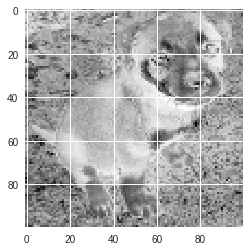

In [34]:
gray = cv2.cvtColor(X_test[1], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
y_test[1]

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
vgg = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(100,100,3))

![alt text](https://www.researchgate.net/publication/321829624/figure/fig2/AS:571845657481217@1513350037610/VGG16-architecture-16.ppm)

In [37]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [0]:
model = Sequential()
for layer in vgg.layers:
  model.add(layer)

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation=keras.activations.relu))
model.add(layers.Dense(1024, activation=keras.activations.relu))
model.add(layers.Dense(2, activation=keras.activations.softmax))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [0]:
model.compile(optimizer = keras.optimizers.Adam(lr=1e-5),loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [44]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=10,verbose=2,validation_split = 0.1)

Train on 21375 samples, validate on 2375 samples
Epoch 1/10
 - 59s - loss: 0.4637 - acc: 0.7872 - val_loss: 0.3657 - val_acc: 0.8467
Epoch 2/10
 - 52s - loss: 0.3409 - acc: 0.8505 - val_loss: 0.3197 - val_acc: 0.8661
Epoch 3/10
 - 52s - loss: 0.3076 - acc: 0.8668 - val_loss: 0.3006 - val_acc: 0.8741
Epoch 4/10
 - 52s - loss: 0.2873 - acc: 0.8765 - val_loss: 0.2901 - val_acc: 0.8787
Epoch 5/10
 - 52s - loss: 0.2725 - acc: 0.8850 - val_loss: 0.2855 - val_acc: 0.8821
Epoch 6/10
 - 52s - loss: 0.2597 - acc: 0.8907 - val_loss: 0.2780 - val_acc: 0.8825
Epoch 7/10
 - 52s - loss: 0.2488 - acc: 0.8957 - val_loss: 0.2760 - val_acc: 0.8825
Epoch 8/10
 - 52s - loss: 0.2396 - acc: 0.9004 - val_loss: 0.2763 - val_acc: 0.8821
Epoch 9/10
 - 52s - loss: 0.2310 - acc: 0.9033 - val_loss: 0.2714 - val_acc: 0.8867
Epoch 10/10
 - 52s - loss: 0.2189 - acc: 0.9119 - val_loss: 0.2682 - val_acc: 0.8851


In [45]:
score=model.evaluate(x=X_test, y=y_test)
print("test_loss and test_accuracy : ",score)

1250/1250 [==============================] - 4s 3ms/step
test_loss and test_accuracy :  [0.2618466724395752, 0.884]
